In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

In [53]:

df_supply = pd.read_csv('../artifacts/data/cleaned/media_county_counts.csv')
df_demand = pd.read_csv('../artifacts/data/cleaned/media_demand.csv')


In [7]:

df_demand['County'] = df_demand['Area_Name'].str.replace(' county', '', case=False).str.strip()
df_demand.loc[df_demand['State'] == 'LA', 'County'] = df_demand.loc[df_demand['State'] == 'LA', 'County'].str.replace(' Parish', '', regex=False)


In [9]:
df_demand.loc[df_demand['State'] == 'AK', 'County'] = df_demand.loc[df_demand['State'] == 'AK', 'County'].str.replace('Borough', '', regex=False)
df_demand.loc[df_demand['State'] == 'AK', 'County'] = df_demand.loc[df_demand['State'] == 'AK', 'County'].str.replace('Census Area', '', regex=False)
df_demand.loc[df_demand['State'] == 'AK', 'County'] = df_demand.loc[df_demand['State'] == 'AK', 'County'].str.replace('City and Borough', '', regex=False)
df_demand.loc[df_demand['State'] == 'AK', 'County'] = df_demand.loc[df_demand['State'] == 'AK', 'County'].str.replace('Municipality', '', regex=False)
df_demand.loc[df_demand['State'] == 'AK', 'County'] = df_demand.loc[df_demand['State'] == 'AK', 'County'].str.replace('City and', '', regex=False)

In [11]:
df_demand.loc[df_demand['State'] == 'AK', 'County'] = df_demand.loc[df_demand['State'] == 'AK', 'County'].str.replace('City and', '', regex=False)

In [12]:
df_demand.to_csv('../artifacts/data/cleaned/media_demand.csv', index=False)

In [54]:
df_supply_demand = df_supply.merge(df_demand, how='right', left_on=['state', 'county'], right_on=['State', 'County'])

In [55]:
df_supply_demand 

,Geography,count_tv,count_radio,count_newspaper,county,state,FIPStxt,State,Area_Name,POP_ESTIMATE_2022,...,Digital devices_Pop_Collage_Plus,Television_Demand_Pop,Television_Demand_Percent,Radio_Demand_Pop,Radio_Demand_Percent,Print_Demand_Pop,Print_Demand_Percent,Digital devices_Demand_Pop,Digital devices_Demand_Percent,County
0,0500000US01001,3.0,2.0,3.0,Autauga,AL,1001,AL,Autauga County,59759,...,15618,37676,63.05,30996,51.87,21769,36.43,50762,84.94,Autauga
1,0500000US01003,1.0,17.0,23.0,Baldwin,AL,1003,AL,Baldwin County,246435,...,74486,154195,62.57,127603,51.78,89737,36.41,211989,86.02,Baldwin
2,0500000US01005,0.0,3.0,8.0,Barbour,AL,1005,AL,Barbour County,24706,...,2575,16004,64.78,12904,52.23,9007,36.46,20294,82.14,Barbour
3,0500000US01007,0.0,2.0,4.0,Bibb,AL,1007,AL,Bibb County,22005,...,2436,14266,64.83,11504,52.28,8036,36.52,18019,81.89,Bibb
4,0500000US01009,0.0,1.0,8.0,Blount,AL,1009,AL,Blount County,59512,...,8248,38189,64.17,30966,52.03,21622,36.33,49646,83.42,Blount
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3139,0500000US56037,0.0,12.0,23.0,Sweetwater,WY,56037,WY,Sweetwater County,41345,...,7460,26227,63.43,21418,51.80,14962,36.19,35140,84.99,Sweetwater
3140,0500000US56039,0.0,22.0,15.0,Teton,WY,56039,WY,Teton County,23287,...,12541,14073,60.43,11988,51.48,8528,36.62,20705,88.91,Teton
3141,0500000US56041,0.0,1.0,3.0,Uinta,WY,56041,WY,Uinta County,20712,...,3468,13182,63.64,10743,51.87,7503,36.23,17522,84.60,Uinta
3142,0500000US56043,0.0,2.0,4.0,Washakie,WY,56043,WY,Washakie County,7719,...,1882,4847,62.79,3992,51.72,2796,36.22,6668,86.38,Washakie


In [56]:
df_supply_demand['tv_ratio'] = df_supply_demand['count_tv'] / df_supply_demand['Television_Demand_Pop']*100000
df_supply_demand['radio_ratio'] = df_supply_demand['count_radio'] / df_supply_demand['Radio_Demand_Pop']*100000
df_supply_demand['newspaper_ratio'] = df_supply_demand['count_newspaper'] / df_supply_demand['Print_Demand_Pop']*100000
ratio_columns = ['tv_ratio', 'radio_ratio', 'newspaper_ratio']
df_supply_demand[ratio_columns] = df_supply_demand[ratio_columns].fillna(0)
df_supply_demand

,Geography,count_tv,count_radio,count_newspaper,county,state,FIPStxt,State,Area_Name,POP_ESTIMATE_2022,...,Radio_Demand_Pop,Radio_Demand_Percent,Print_Demand_Pop,Print_Demand_Percent,Digital devices_Demand_Pop,Digital devices_Demand_Percent,County,tv_ratio,radio_ratio,newspaper_ratio
0,0500000US01001,3.0,2.0,3.0,Autauga,AL,1001,AL,Autauga County,59759,...,30996,51.87,21769,36.43,50762,84.94,Autauga,7.962629,6.452445,13.781065
1,0500000US01003,1.0,17.0,23.0,Baldwin,AL,1003,AL,Baldwin County,246435,...,127603,51.78,89737,36.41,211989,86.02,Baldwin,0.648529,13.322571,25.630453
2,0500000US01005,0.0,3.0,8.0,Barbour,AL,1005,AL,Barbour County,24706,...,12904,52.23,9007,36.46,20294,82.14,Barbour,0.000000,23.248605,88.819807
3,0500000US01007,0.0,2.0,4.0,Bibb,AL,1007,AL,Bibb County,22005,...,11504,52.28,8036,36.52,18019,81.89,Bibb,0.000000,17.385257,49.776008
4,0500000US01009,0.0,1.0,8.0,Blount,AL,1009,AL,Blount County,59512,...,30966,52.03,21622,36.33,49646,83.42,Blount,0.000000,3.229348,36.999353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3139,0500000US56037,0.0,12.0,23.0,Sweetwater,WY,56037,WY,Sweetwater County,41345,...,21418,51.80,14962,36.19,35140,84.99,Sweetwater,0.000000,56.027640,153.722764
3140,0500000US56039,0.0,22.0,15.0,Teton,WY,56039,WY,Teton County,23287,...,11988,51.48,8528,36.62,20705,88.91,Teton,0.000000,183.516850,175.891182
3141,0500000US56041,0.0,1.0,3.0,Uinta,WY,56041,WY,Uinta County,20712,...,10743,51.87,7503,36.23,17522,84.60,Uinta,0.000000,9.308387,39.984006
3142,0500000US56043,0.0,2.0,4.0,Washakie,WY,56043,WY,Washakie County,7719,...,3992,51.72,2796,36.22,6668,86.38,Washakie,0.000000,50.100200,143.061516


In [57]:
df_supply_demand.to_csv('../artifacts/data/cleaned/media_supply_demand.csv', index=False)

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

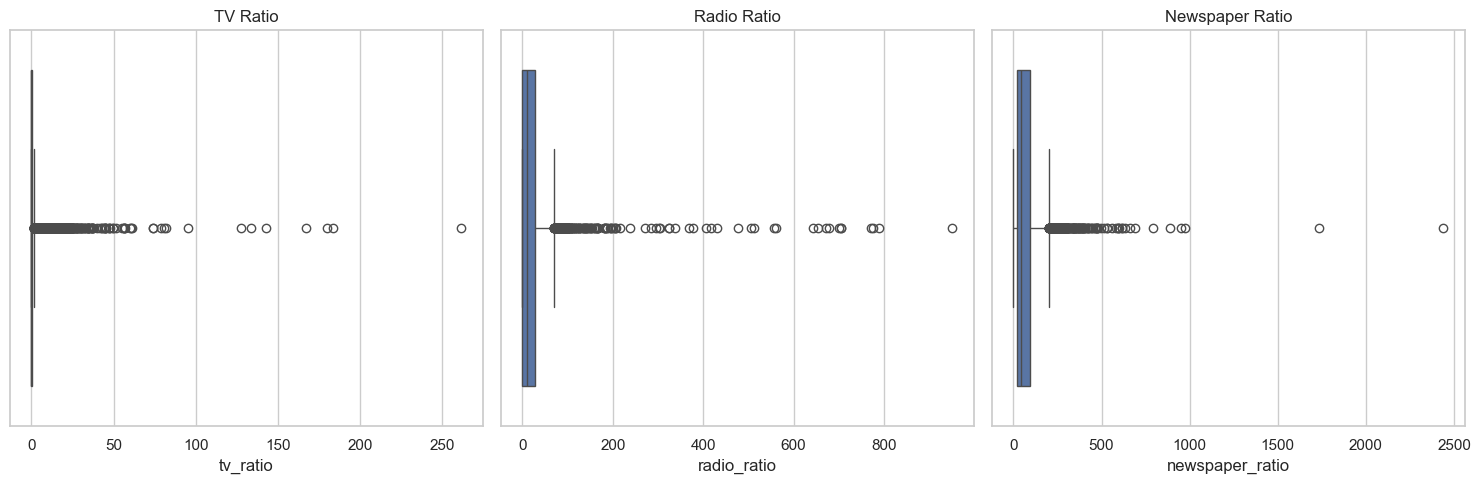

In [58]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create a figure and a set of subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Create box plots
sns.boxplot(ax=axes[0], x=df_supply_demand['tv_ratio'])
axes[0].set_title('TV Ratio')

sns.boxplot(ax=axes[1], x=df_supply_demand['radio_ratio'])
axes[1].set_title('Radio Ratio')

sns.boxplot(ax=axes[2], x=df_supply_demand['newspaper_ratio'])
axes[2].set_title('Newspaper Ratio')

# Enhance layout
plt.tight_layout()

# Display the plot
plt.show()


In [59]:
import pandas as pd

def create_color_column(df, column_name, new_color_column):
    """
    Modifies the DataFrame to include a new column for color-coding values in another column,
    based on adjusted thresholds that exclude outliers.

    Parameters:
        df (pd.DataFrame): The DataFrame to modify.
        column_name (str): The name of the column from which to base the colors.
        new_color_column (str): The name of the new column to create for the colors.
    """
    # Step 1: Replace NaN values with zero
    df[column_name].fillna(0, inplace=True)

    # Step 2: Calculate the interquartile range to determine thresholds without outliers
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds that exclude outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter data to exclude outliers for threshold determination
    filtered_data = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

    # Recalculate min and max on filtered data
    min_value = filtered_data[column_name].min()
    max_value = filtered_data[column_name].max()

    # Calculate equal distribution thresholds based on filtered data
    threshold1 = min_value + (max_value - min_value) / 3
    threshold2 = min_value + 2 * (max_value - min_value) / 3

    # Step 3: Assign colors based on thresholds
    def assign_color(value):
        if value <= threshold1:
            return 'red'
        elif value <= threshold2:
            return 'yellow'
        else:
            return 'green'

    df[new_color_column] = df[column_name].apply(assign_color)




In [60]:

create_color_column(df_supply_demand, 'tv_ratio', 'tv_color')
create_color_column(df_supply_demand, 'radio_ratio', 'radio_color')
create_color_column(df_supply_demand, 'newspaper_ratio', 'newspaper_color')

In [61]:
df_supply_demand.to_csv('../artifacts/data/cleaned/media_supply_demand_color.csv', index=False)